In [11]:
%matplotlib inline

import bloscpack as bp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
import sys 

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from metadata import *
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from data_manager import DataManager

# Filepaths

In [12]:
# Encodes metainformation used by the rigid erosian algorithm for alignment
param_fp = os.path.join(os.environ['REPO_DIR'], 'preprocess', 'parameters', "Parameters_Rigid_MutualInfo.txt")
print( param_fp )

/home/alexn/brainDev/src/preprocess/parameters/Parameters_Rigid_MutualInfo.txt


In [13]:
stack = 'DK18'

# broken
curr_img_name = 'DK17_18_slide103_2019_03_11-S2' # moving
prev_img_name = 'DK17_18_slide100_2019_03_11-S4' # fixed
# (TransformParameters -0.006014 5.368759 36.761391)

# good
# curr_img_name = 'DK17_18_slide100_2019_03_11-S4' # moving
# prev_img_name = 'DK17_18_slide100_2019_03_11-S2' # fixed
# (TransformParameters -0.047222 18.251501 -8.580737)

output_subdir = os.path.join(ROOT_DIR, 'CSHL_data_processed', stack, stack+'_elastix_output', \
                             curr_img_name + '_to_' + prev_img_name)

transformation_params_fp = os.path.join( output_subdir, 'TransformParameters.0.txt')
# Contains transformation parameters (3 numbers)
# Contains size of image + center of rotation (always the centerpoint)

with open(transformation_params_fp, 'r') as f:
    print(f.read())

(Transform "EulerTransform")
(NumberOfParameters 3)
(TransformParameters 0.172446 -195.204481 -52.552094)
(InitialTransformParametersFileName "NoInitialTransform")
(HowToCombineTransforms "Compose")

// Image specific
(FixedImageDimension 2)
(MovingImageDimension 2)
(FixedInternalImagePixelType "float")
(MovingInternalImagePixelType "float")
(Size 1912 989)
(Index 0 0)
(Spacing 1.0000000000 1.0000000000)
(Origin 0.0000000000 0.0000000000)
(Direction 1.0000000000 0.0000000000 0.0000000000 1.0000000000)
(UseDirectionCosines "true")

// EulerTransform specific
(CenterOfRotationPoint 955.5000000000 494.0000000000)

// ResampleInterpolator specific
(ResampleInterpolator "FinalBSplineInterpolator")
(FinalBSplineInterpolationOrder 3)

// Resampler specific
(Resampler "DefaultResampler")
(DefaultPixelValue 0.000000)
(ResultImageFormat "tif")
(ResultImagePixelType "unsigned char")
(CompressResultImage "false")



# Real Stuff

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide112_2019_03_11-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide111_2019_03_11-S4_thumbnail_NtbNormalized.tif


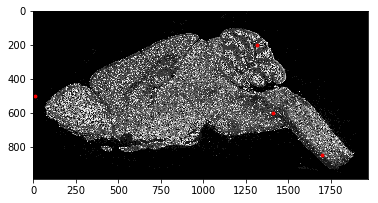

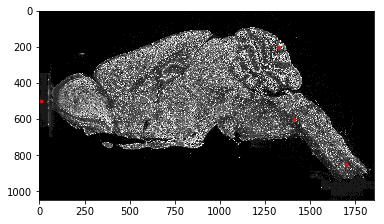

In [14]:
stack = 'DK18'

curr_img_name = 'DK17_18_slide112_2019_03_11-S2' # moving
prev_img_name = 'DK17_18_slide111_2019_03_11-S4' # fixed
# (TransformParameters -0.073911 41.904976 30.899787)
xoffset = 42
yoffset = 31
angle = -0.074

output_subdir = os.path.join(ROOT_DIR, 'CSHL_data_processed', stack, stack+'_elastix_output', \
                             curr_img_name + '_to_' + prev_img_name)

transformation_params_fp = os.path.join( output_subdir, 'TransformParameters.0.txt')
# Contains transformation parameters (3 numbers)
# Contains size of image + center of rotation (always the centerpoint)

#with open(transformation_params_fp, 'r') as f:
#    print(f.read())
    
    
curr_img_notrans = DataManager.load_image_v2(stack=stack, 
                                section=metadata_cache['filenames_to_sections'][stack][curr_img_name],
                                 prep_id='None',
                                 resol='thumbnail', version='NtbNormalized')
prev_img_notrans = DataManager.load_image_v2(stack=stack, 
                                section=metadata_cache['filenames_to_sections'][stack][prev_img_name],
                                 prep_id='None',
                                 resol='thumbnail', version='NtbNormalized')


plt.imshow(curr_img_notrans*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()
plt.imshow(prev_img_notrans*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()

Load elastix-computed transform: /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output/DK17_18_slide112_2019_03_11-S2_to_DK17_18_slide111_2019_03_11-S4/TransformParameters.0.txt


[[ 9.97269825e-01  7.38437244e-02  5.81558011e+00]
 [-7.38437244e-02  9.97269825e-01  1.00780801e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


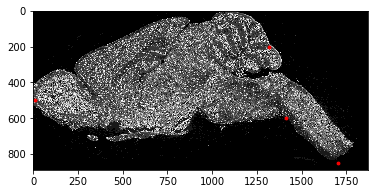

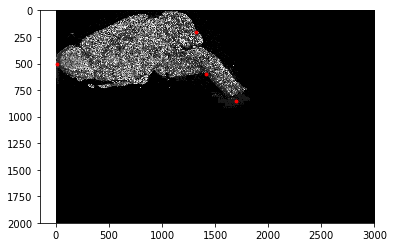

In [23]:
t_matrix = DataManager.load_consecutive_section_transform(
    moving_fn=curr_img_name, 
    fixed_fn=prev_img_name, 
    elastix_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output', 
    custom_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_custom_output')

#final_transforms_to_anchor_fp = DataManager.get_transforms_filename( stack )
prev_img_transformed_pairwise = sp.ndimage.affine_transform( prev_img_notrans, t_matrix,
                                                 output_shape=(2000,3000) )

print(t_matrix)

# 
plt.imshow(curr_img_notrans[100:,100:]*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()
plt.imshow(prev_img_transformed_pairwise*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()

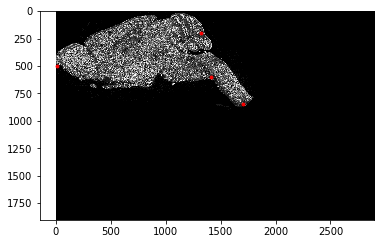

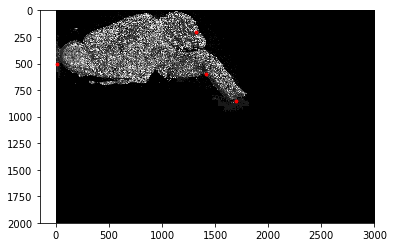

In [16]:
# Loads the transforms from the csv file
transforms_dict = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)

curr_img_transformed = sp.ndimage.affine_transform( curr_img_notrans, transforms_dict[curr_img_name],
                                                 output_shape=(2000,3000) )
prev_img_transformed = sp.ndimage.affine_transform( prev_img_notrans, transforms_dict[prev_img_name],
                                                 output_shape=(2000,3000))

# GOOOOOD
plt.imshow(curr_img_transformed[100:,100:]*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()
plt.imshow(prev_img_transformed*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()

In [17]:
# Loads the transforms from the csv file
transforms_dict = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)

# curr_img_transformed = sp.ndimage.affine_transform( curr_img_notrans, transforms_dict[curr_img_name],
#                                                  output_shape=(2000,3000) )
# prev_img_transformed = sp.ndimage.affine_transform( prev_img_notrans, transforms_dict[prev_img_name],
#                                                  output_shape=(2000,3000))

curr_img_transformed = cv2.warpAffine( curr_img_notrans, 
                                      tuple(transforms_dict[curr_img_name][0:2,0:3]),
                                      np.shape(curr_img_notrans) )
prev_img_transformed = sp.ndimage.affine_transform( prev_img_notrans, transforms_dict[prev_img_name],
                                                 output_shape=(2000,3000))

# GOOOOOD
plt.imshow(curr_img_transformed[100:,100:]*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()
plt.imshow(prev_img_transformed*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()

TypeError: M is not a numerical tuple

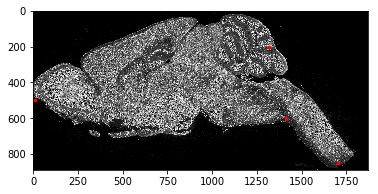

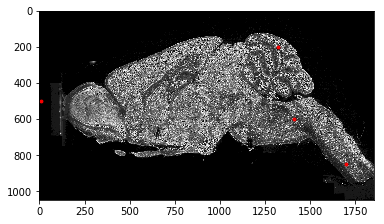

In [360]:
t_mat_curr = [[ 9.98530944e-01, -5.41844511e-02,  5.47377785e+01],
              [  0.05418445,   0.99853094, -48.03483149]]
t_mat_prev = [[ 9.99805961e-01,  1.96987258e-02,  5.50840629e+01],
              [-1.96987258e-02,  9.99805961e-01,  5.29130308e+01]]

curr_img_transformed = cv2.warpAffine( curr_img_notrans, 
                                      np.array( t_mat_curr ),
                                     (np.shape(curr_img_notrans)[1],np.shape(curr_img_notrans)[0]) )
              
prev_img_transformed = cv2.warpAffine( prev_img_notrans, 
                                      np.array( t_mat_prev ),
                                    (np.shape(prev_img_notrans)[1],np.shape(prev_img_notrans)[0]) )

plt.imshow(curr_img_transformed[100:,100:]*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()
plt.imshow(prev_img_transformed*5, cmap='gray')
plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
plt.show()

In [343]:
tuple(transforms_dict[curr_img_name][0:2,0:3])

(array([ 9.98530944e-01, -5.41844511e-02,  5.47377785e+01]),
 array([  0.05418445,   0.99853094, -48.03483149]))

In [349]:
transforms_dict[prev_img_name]

array([[ 9.99805961e-01,  1.96987258e-02,  5.50840629e+01],
       [-1.96987258e-02,  9.99805961e-01,  5.29130308e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [180]:
T_composed = np.eye(3)
for i in range(anchor_idx, moving_idx, -1):
    T_composed = np.dot(np.linalg.inv(transformation_to_previous_sec[i]), T_composed)
# transformation_to_anchor_sec[moving_idx] = T_composed
transformation_to_anchor_sec[image_name_list[moving_idx]] = T_composed

NameError: name 'anchor_idx' is not defined

In [198]:
print np.shape( curr_img_notrans )[0]/2
print np.shape( curr_img_notrans )[1]/2

494
985


In [199]:
print np.shape( prev_img_notrans )[0]/2
print np.shape( prev_img_notrans )[1]/2

523
927


In [235]:
# Loads the transforms from the csv file
transforms_dict = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=False)


In [234]:
DataManager.load_transforms(stack, downsample_factor=32, use_inverse=False)['DK17_18_slide048_2019_03_10-S2']

array([[ 9.98109471e-01,  6.14612393e-02, -5.19198169e+02],
       [-6.14612393e-02,  9.98109471e-01, -1.83016836e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [279]:
T_anchor_to_individual_section_image_resol = transforms_dict[curr_img_name]

uv_wrt_alignedPadded_um_curr_section = np.dot(T_anchor_to_individual_section_image_resol,
    np.c_[uv_um[curr_section_mask, :2],
    np.ones((np.count_nonzero(curr_section_mask),))].T).T[:, :2]

uv_wrt_alignedPadded_outResol_curr_section = \
    uv_wrt_alignedPadded_um_curr_section / \
    convert_resolution_string_to_um(stack=stack, resolution=out_image_resolution)

p_wrt_outdomain_outResol[curr_section_mask] = \
    np.column_stack([uv_wrt_alignedPadded_outResol_curr_section,
    sec * np.ones((len(uv_wrt_alignedPadded_outResol_curr_section),))])

NameError: name 'uv_um' is not defined

# Formalizing

In [361]:
metadata_cache['sections_to_filenames'][stack]

['anchor_fn',
 'valid_filenames_all',
 'valid_sections_all',
 'image_shape',
 'cropbox',
 'valid_sections',
 'filenames_to_sections',
 'sections_to_filenames',
 'section_limits',
 'valid_filenames']

In [462]:
def warp_print_image( section_num, use_inverse=False, stack='DK18' ):
    # Loads the transforms from the csv file
    transforms_dict = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=use_inverse)
    
    img_fn = metadata_cache['sections_to_filenames'][stack][section_num]
    img = DataManager.load_image_v2(stack= stack, 
                                section= section_num,
                                prep_id= 'None',
                                resol= 'thumbnail', 
                                version='NtbNormalized')
    
    transform_matrix = transforms_dict[img_fn]
    
    # Copied from warp_crop
#     print transform_matrix
# Moves image in opposite vertical direction, identical to "use_inverse=True above"
    #transform_matrix = np.linalg.inv(convert_2d_transform_forms(transform_matrix, out_form=(3,3)))
#     print transform_matrix
    
    img_transformed = sp.ndimage.affine_transform( img, transform_matrix,
                                                 output_shape=(1500,2500),
                                                 mode = 'constant')

    print np.shape(img)
    img_y_len = np.shape(img)[0]
    img_x_len = np.shape(img)[1]
    
#     img_transformed_padded = np.zeros((2000,3000))
#     img_transformed_padded[1000:,1000:] = img_transformed
    
    #img_transformed_padded = np.zeros((3000,4000))
    #img_transformed_padded[img_y_len:img_y_len+1000,img_x_len:img_x_len+2000] = img_transformed
    
    # GOOOOOD
    plt.imshow(img_transformed*7, cmap='gray')
#     plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
    #plt.scatter([1200],[1250], c='r', s=8)
    plt.scatter([img_x_len],[img_y_len], c='r', s=8)
    plt.show()


In [ ]:
warp_print_image( 205 )

In [ ]:
warp_print_image( 205 )

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S2_thumbnail_NtbNormalized.tif


(989, 1623)


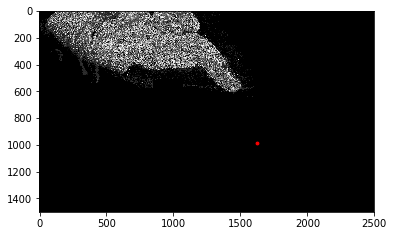

In [455]:
warp_print_image( 205 )

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S2_thumbnail_NtbNormalized.tif


(989, 1623)


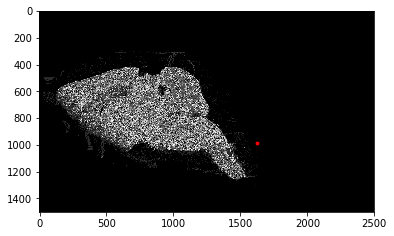

In [458]:
warp_print_image( 205 )

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide100_2019_03_11-S4_thumbnail_NtbNormalized.tif


(989, 1912)


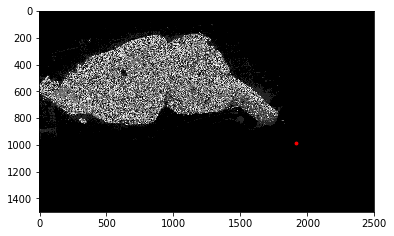

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S2_thumbnail_NtbNormalized.tif


(989, 1623)


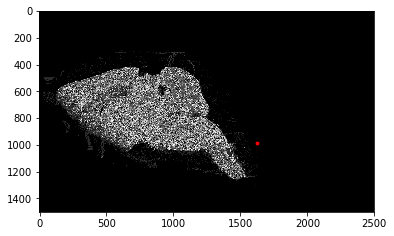

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S4_thumbnail_NtbNormalized.tif


(989, 1624)


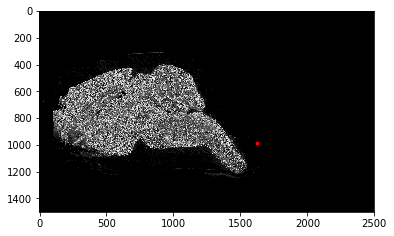

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide104_2019_03_11-S2_thumbnail_NtbNormalized.tif


(989, 1854)


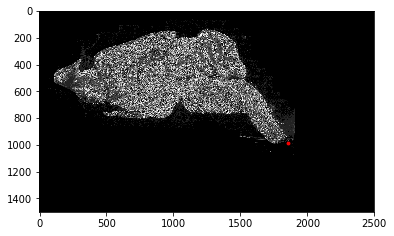

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide104_2019_03_11-S4_thumbnail_NtbNormalized.tif


(1047, 1565)


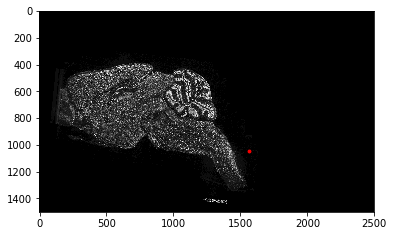

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide105_2019_03_11-S2_thumbnail_NtbNormalized.tif


(932, 1913)


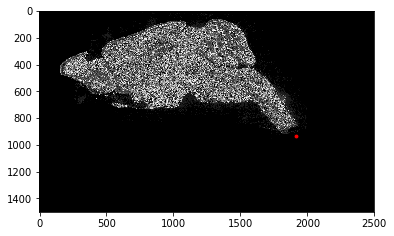

In [460]:
for i in range(200,210):
    try:
        warp_print_image( i, use_inverse=False )
    except:
        pass

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide100_2019_03_11-S4_thumbnail_NtbNormalized.tif


(989, 1912)


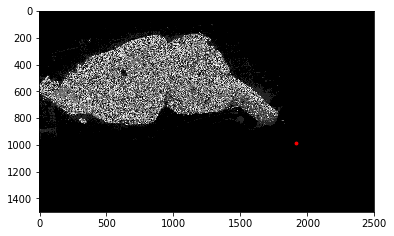

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S2_thumbnail_NtbNormalized.tif


(989, 1623)


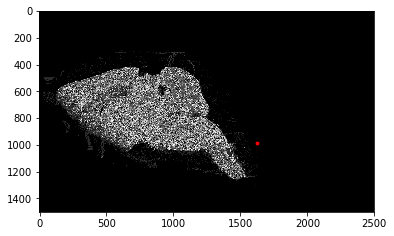

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S4_thumbnail_NtbNormalized.tif


(989, 1624)


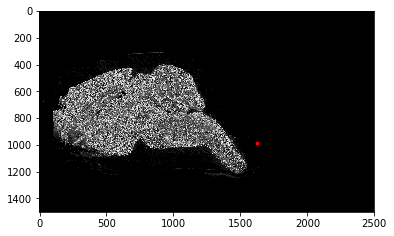

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide104_2019_03_11-S2_thumbnail_NtbNormalized.tif


(989, 1854)


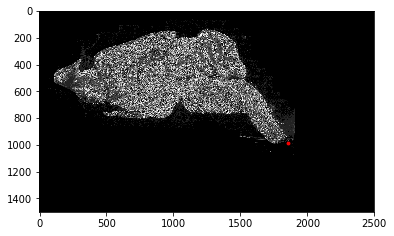

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide104_2019_03_11-S4_thumbnail_NtbNormalized.tif


(1047, 1565)


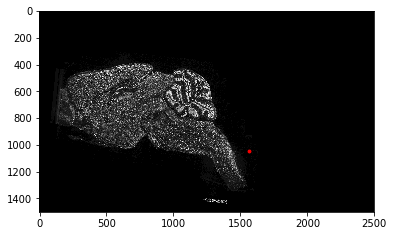

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide105_2019_03_11-S2_thumbnail_NtbNormalized.tif


(932, 1913)


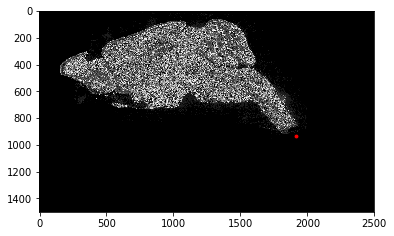

In [463]:
for i in range(200,210):
    try:
        warp_print_image( i, use_inverse=True )
    except:
        pass

In [ ]:
T = np.linalg.inv(convert_2d_transform_forms(transform=op_params, out_form=(3,3)))
op_str += " +distort AffineProjection '%(sx)f,%(rx)f,%(ry)f,%(sy)f,%(tx)f,%(ty)f' " % {
     'sx':T[0,0],
     'sy':T[1,1],
     'rx':T[1,0],
    'ry':T[0,1],
     'tx':T[0,2],
     'ty':T[1,2],}

In [464]:
execute_command("convert \"%(input_fp)s\"  +repage -virtual-pixel background -background %(bg_color)s %(op_str)s -flatten -compress lzw \"%(output_fp)s\"" % \
                {'op_str': op_str,
                 'input_fp': input_fp,
                 'output_fp': output_fp,
                 'bg_color': pad_color})

NameError: name 'op_str' is not defined